# 简介
matplotlib是一个python版的matlab绘图借口，以2D为。支持python，numpy，pandas基本数据结构，运行高效且有较丰富的图表库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 直接生成图表

In [3]:
# 直接生成图表

plt.plot(np.random.rand(10))
plt.show()

## 嵌入式图表

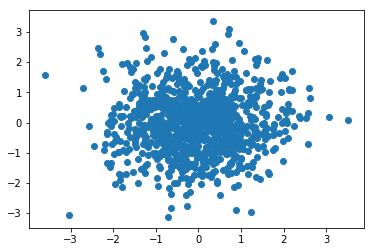

In [2]:
# 嵌入式图表显示
%matplotlib inline

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)

## 可交互的matplotlib窗口

<IPython.core.display.Javascript object>


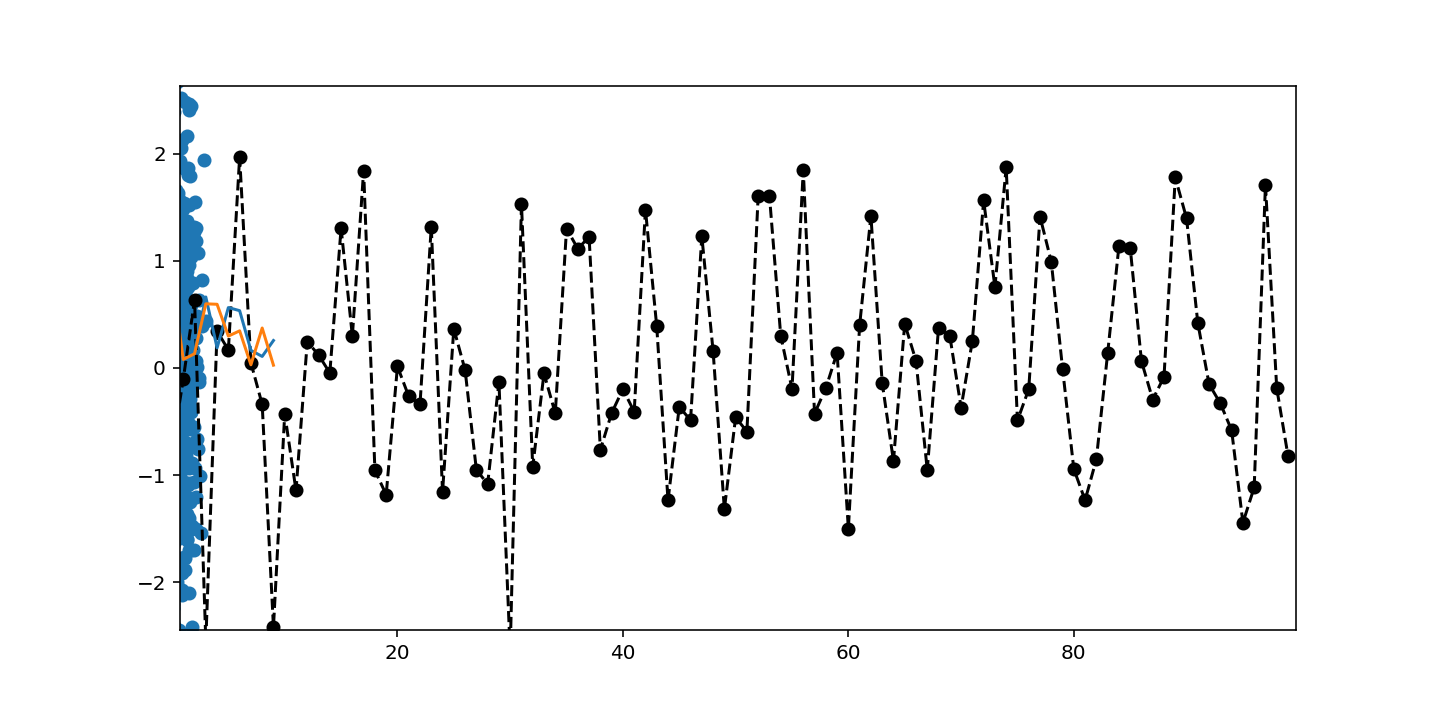

In [6]:
%matplotlib notebook

s = pd.Series(np.random.randn(100))
s.plot(style='k--o', figsize=(10, 5))

## 弹出matplotlib控制台

In [4]:
%matplotlib qt5

df = pd.DataFrame(np.random.rand(50, 2), columns=['A', 'B'])
df.hist(figsize=(12, 5), color='g', alpha=0.8)

# plt.close() # 关闭窗口
# plt.gcf().clear() # 每次清空图表内内容

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1281667f0>,
      dtype=object)

# 图表的基本元素
* figsize 图表大小
* plt.legend(loc) 显示图例  
可选：best, upper right, upper left, lower right, lower left, right, center left, center right, lower center, upper center, center
* plt.grid(True, linestyle='--', color='gray', linewidth='0.5', axis='x') 创建格网
    - linestyle: 线型
    - color: 颜色
    - linewidth: 宽度
    - axis: x/y/both，显示x/y/两者的格网

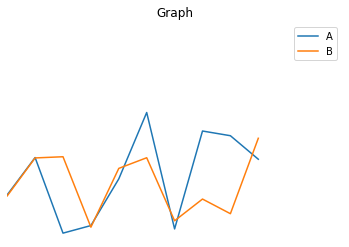

In [12]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
fig = df.plot(figsize=(6, 4)) # figsize用于设置窗口大小

plt.title('Graph') # 图名
plt.xlabel('Plot Number') # x轴标签
plt.ylabel('Important var') # y轴标签
plt.legend(loc='best') # 显示图例，loc表示位置

plt.xlim([0, 12]) # x轴边界
plt.ylim([0, 1.5]) # y轴边界
plt.xticks(range(10)) # x轴刻度
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]) # y轴刻度
fig.set_xticklabels('%.1f' % i for i in range(10)) # x轴刻度标签
fig.set_yticklabels('%.2f' % i for i in [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]) # y轴刻度标签

plt.grid() # 创建格网
plt.tick_params(bottom='on', top='off', left='on', right='off') # 刻度显示

import matplotlib
matplotlib.rcParams['xtick.direction'] = 'out' # 刻度的方向
matplotlib.rcParams['ytick.direction'] = 'inout'

plt.axis('off') # 关闭坐标轴显示
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False) # 隐藏x轴
frame.axes.get_yaxis().set_visible(False) # 隐藏y轴

# 图表的样式参数
1. linestyle 线

| linestyle | 含义 |
| ------ | ------ |
| - | solid line style 实线 |
| -- | dashed line style 虚线|
| -. | dash-dot line style 虚线+点|
| : | dotted line style 点|

2. style 风格字符串  
style参数可以包含linestyle, marker, solor
3. color

| color | 含义 |
| ---- | ---- |
| red/r | 红 |
| green/g | 绿 |
| black/k | 黑 |
| blue/b | 蓝 |

4. marker 线上的标记

| marker | 含义 |
| ---- | ---- |
| . | point marker 点 |
| , | pixel marker 像素点 |
| o | circle marker 圆 |
| * | star marker 星 |
| + | plus marker 加号 |

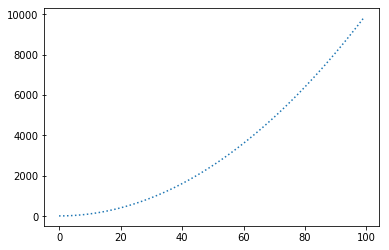

In [14]:
plt.plot([i**2 for i in range(100)],
        linestyle=':')

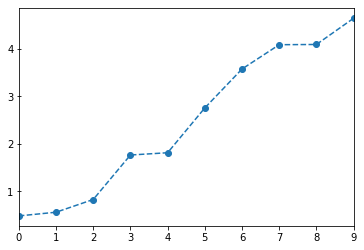

In [18]:
s = pd.Series(np.random.rand(10).cumsum())
s.plot(linestyle='--', marker='o')

(array([11., 12., 10., 11.,  7., 10.,  7., 10.,  8., 14.]),
 array([0.01204775, 0.11047696, 0.20890617, 0.30733539, 0.4057646 ,
        0.50419381, 0.60262302, 0.70105223, 0.79948144, 0.89791065,
        0.99633986]),
 <a list of 10 Patch objects>)

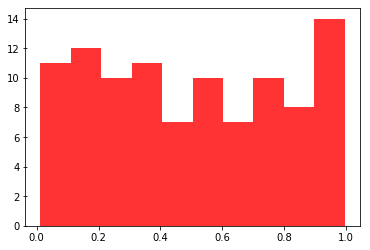

In [22]:
plt.hist(np.random.rand(100), color='r', alpha=0.8)

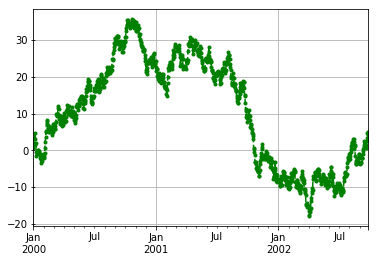

In [26]:
# style风格字符串，此处包括linestyle='--', marker='.', color='g'

ts = pd.Series(np.random.randn(1000).cumsum(), index=pd.date_range('1/1/2000', periods=1000))
ts.plot(style='--g.', grid=True)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


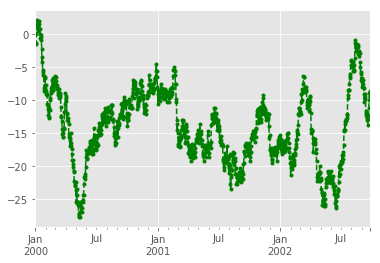

In [27]:
# 整体风格样式
# 选用样式后，所有图表都会套用此样式

import matplotlib.style as psl
print(plt.style.available) # 查看样式列表

psl.use('ggplot') # 设置ggplot样式
ts = pd.Series(np.random.randn(1000).cumsum(), index=pd.date_range('1/1/2000', periods=1000))
ts.plot(style='--g.', grid=True)

# 刻度、注解、图表输出

## 刻度

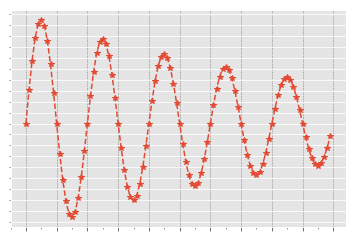

In [40]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

t = np.arange(0.0, 100.0, 1)
s = np.sin(0.1*np.pi*t)*np.exp(-t*0.01)
ax = plt.subplot(1, 1, 1)
plt.plot(t, s, '--*')
plt.grid(True, linestyle='--', color='gray', linewidth='0.5', axis='both')
# plt.legend() # 显示图例

xmajorLocator = MultipleLocator(10) # 将x主刻度标签设置为10的倍数
xmajorFormatter = FormatStrFormatter('%.0f') # 设置x轴标签文本的格式
xminorLocator = MultipleLocator(5) # 将x次刻度标签设置为5的倍数
ymajorLocator = MultipleLocator(0.5) # 将y主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%.1f') # 设置y轴标签文本的格式
yminorLocator = MultipleLocator(0.1) # 将y次刻度标签设置为0.1的倍数

ax.xaxis.set_major_locator(xmajorLocator) # 设置x轴主刻度
ax.xaxis.set_major_formatter(xmajorFormatter) # x轴标签文本格式
ax.xaxis.set_minor_locator(xminorLocator) # 设置x轴次刻度
ax.yaxis.set_major_locator(ymajorLocator) # 设置y轴主刻度
ax.yaxis.set_major_formatter(ymajorFormatter) # y轴标签文本格式
ax.yaxis.set_minor_locator(yminorLocator) # 设置y轴次刻度

ax.xaxis.grid(True, which='major') # x坐标轴的网格使用主刻度
ax.yaxis.grid(True, which='minor') # y坐标轴的网格使用次刻度

ax.xaxis.set_major_formatter(plt.NullFormatter()) # 删除x轴刻度显示
ax.yaxis.set_major_locator(plt.NullLocator()) # 删除y轴刻度标签显示

## 注释

Text(5, 0.5, 'text')

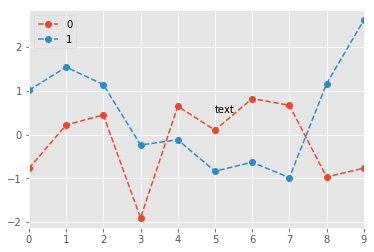

In [42]:
df = pd.DataFrame(np.random.randn(10, 2))
df.plot(style='--o')

# plt.text(横坐标, 纵坐标, '注释')
plt.text(5, 0.5, 'text', fontsize=10) # 图内添加注释

## 图表输出

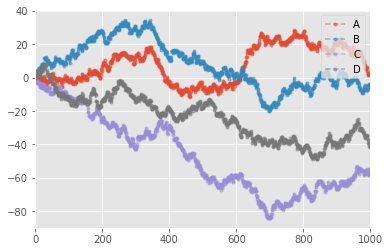

In [43]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
df = df.cumsum()
df.plot(style='--.', alpha=0.5)
plt.legend(loc='upper right')

# 保存
plt.savefig('/Users/xingyu/Desktop/test.png',
           dpi=400, # 图片清晰程度
           bbox_inches='tight', # 图片需要保存部分，设置tight则尝试剪除图表周围的空白部分
           facecolor='g', # 图片面板色，默认为'w'
           edgecolor='b' # 图片边缘色
           )

# 子图
在Matplotlib中，整个图像为一个Figure对象。一个Figure对象可以包含一个或多个Axes对象。  
每个Axes对象都是一个拥有自己坐标系统的绘图区域

**plt.figure()** 绘图对象  
语法：
plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=, **kwargs)  
- num：第几张图
- 调用plot时，如果设置plt.figure()，则实际上相当于执行了一个plt.subplots(1, 1, 1)

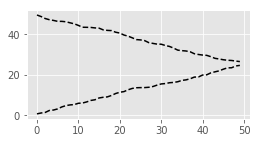

In [45]:
# 图1
fig1 = plt.figure(num=1, figsize=(4, 2))
plt.plot(np.random.rand(50).cumsum(), 'k--')

# 图2
fig2 = plt.figure(num=1, figsize=(4, 2))
plt.plot(50-np.random.rand(50).cumsum(), 'k--')

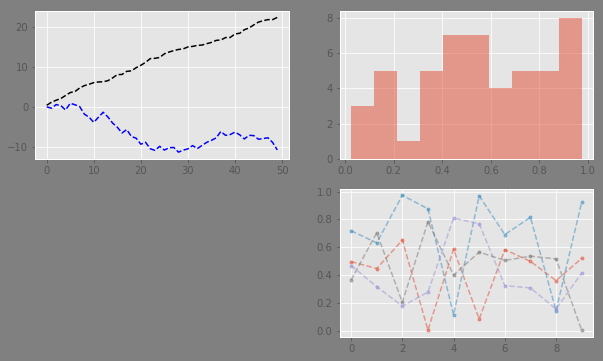

In [47]:
# 子图创建 - 先建立子图再填充图表

fig = plt.figure(figsize=(10, 6), facecolor='gray')

# 图1
ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.rand(50).cumsum(), 'k--')
plt.plot(np.random.randn(50).cumsum(), 'b--')

# 图2
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(np.random.rand(50), alpha=0.5)

# 图3
ax4 = fig.add_subplot(2, 2, 4)
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
ax4.plot(df2, alpha=0.5, linestyle='--', marker='.')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11da4d5f8>
  <matplotlib.axes._subplots.AxesSubplot object at 0x11dba0b38>]] (2, 3) <class 'numpy.ndarray'>


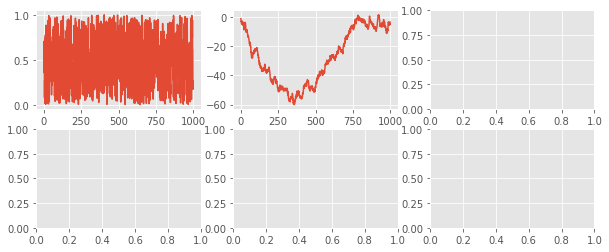

In [50]:
# 子图创建 - 创建一个新的figure，返回一个subplot对象的numpy数组

fig, axes = plt.subplots(2, 3, figsize=(10, 4)) # 创建一个2*3的图表figure
ts = pd.Series(np.random.randn(1000).cumsum())
print(axes, axes.shape, type(axes))

ax1 = axes[0, 1] # 选取第1行第二列的图表进行绘图
ax1.plot(ts)

axes[0, 0].plot(np.random.rand(1000)) # 第一行第一列的图表进行绘图

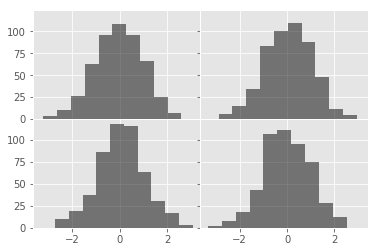

In [51]:
# plt.subplots() 参数调整

# sharex/sharey：各图之间共享x/y轴刻度
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), color='k', alpha=0.5)
        
# wspace/hspace：控制宽度和高度的百分比，如subplot间的间距
plt.subplots_adjust(wspace=0, hspace=0)

,A,B,C,D
0,0.919677,-0.596011,0.019651,-0.195381
1,0.113751,-0.707218,-0.535779,0.276982
2,-0.972150,-0.473764,-2.336276,-1.713171
3,-2.666490,0.756350,-2.882474,-0.222793
4,-1.797617,2.026186,-3.346174,1.717246


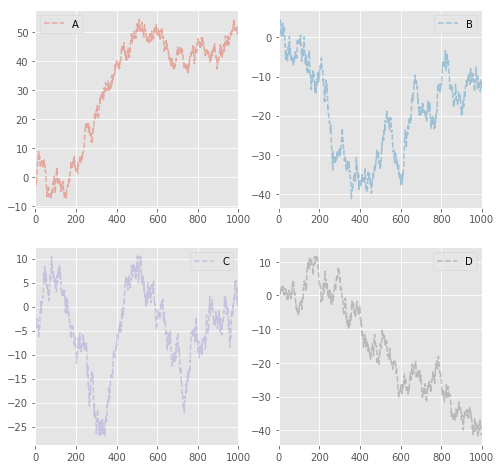

In [59]:
# 子图创建 - 多系列图，分别绘制

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD')).cumsum()
df.plot(style='--', alpha=0.4, grid=True, figsize=(8, 8),
       subplots=True, # 是否分别绘制系列子图
       layout=(2, 2), # 绘制子图矩阵，按顺序填充
       sharex=False
       )
plt.subplots_adjust(wspace=0.2, hspace=0.2)

df.head()

# 基本图表绘制
图表类别：线型图、柱状图、密度图...以横纵坐标两个纬度为主

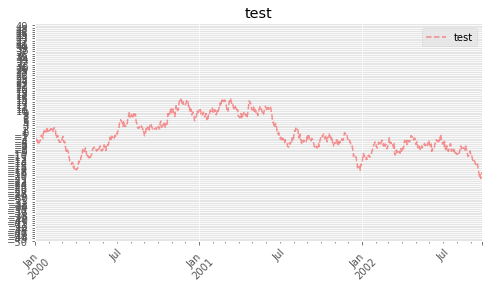

In [61]:
# Series直接生成图表

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)).cumsum()
ts.plot(kind='line', # line/bar/barh
       label='test',
       style='--g',
       color='red',
       alpha=0.4,
       use_index=True, # 是否以index作为横轴
       rot=45, # 横坐标旋转角度
       grid=True, # 网格
       ylim=[-50, 50], # y轴刻度范围
       yticks=list(range(-50, 50)),
       figsize=(8, 4),
       title='test',
       legend=True
       )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ec3a240>,
      dtype=object)

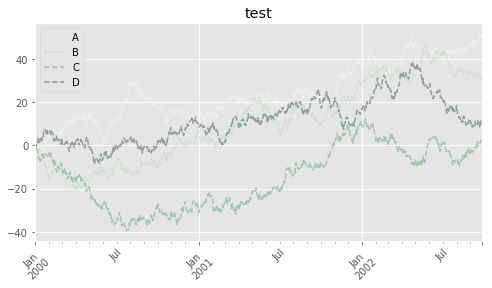

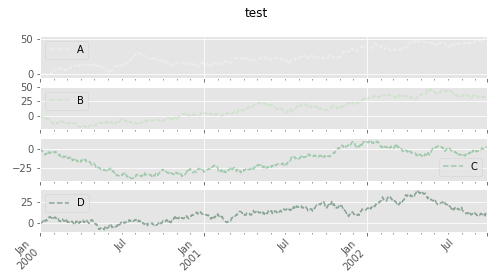

In [63]:
# DataFrame直接生成图表

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD')).cumsum()
df.plot(kind='line',
       style='--',
       alpha=0.4,
       use_index=True,
       figsize=(8, 4),
       rot=45,
       grid=True,
       title='test',
       legend=True,
       subplots=False, # 是否将df各列绘制到不同图表
       colormap='Greens'
       )

df.plot(kind='line',
       style='--',
       alpha=0.4,
       use_index=True,
       figsize=(8, 4),
       rot=45,
       grid=True,
       title='test',
       legend=True,
       subplots=True, # 是否将df各列绘制到不同图表
       colormap='Greens'
       )

# 柱状图、堆叠图
* plt.plot(kind='bar/barh')
* plt.bar()

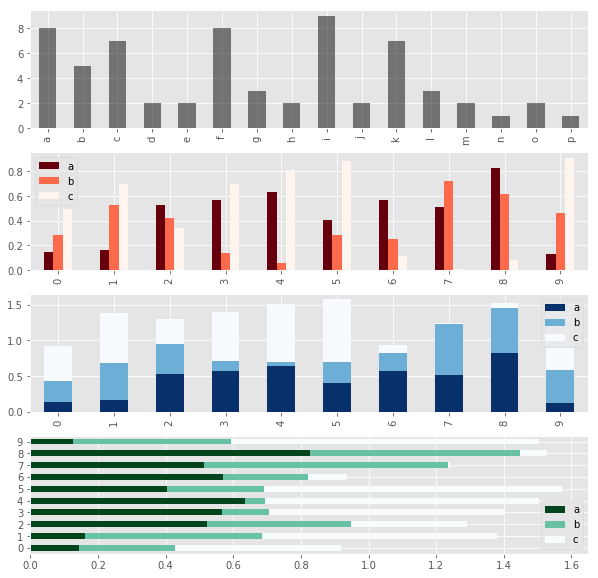

In [67]:
# plt.plot(kind='bar')

fig, axes = plt.subplots(4, 1, figsize=(10, 10)) # 4*1图表矩阵
s = pd.Series(np.random.randint(0, 10, 16), index=list('abcdefghijklmnop'))
df = pd.DataFrame(np.random.rand(10, 3), columns=['a', 'b', 'c'])

# 单系列柱状图
s.plot(kind='bar', color='k', grid=True, alpha=0.5, ax=axes[0]) # 第一个图表进行绘图

# 多系列柱状图
df.plot(kind='bar', ax=axes[1], grid=True, colormap='Reds_r') # 第二个图表进行绘图

# 多系列堆叠柱状图
df.plot(kind='bar', ax=axes[2], grid=True, colormap='Blues_r', stacked=True) # 第三个图表进行绘图

# 横向堆叠柱状图
df.plot.barh(ax=axes[3], grid=True, stacked=True, colormap='BuGn_r') # 第四个图表进行绘图

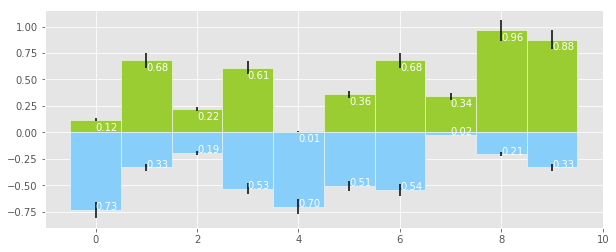

In [83]:
# plt.bar()

plt.figure(figsize=(10, 4))
x = np.arange(10)
y1 = np.random.rand(10)
y2 = np.random.rand(10)

# width宽度比例，facecolor填充颜色，edgecolor边框颜色，xerr/yerr：x/y方向误差线
plt.bar(x, y1, width=1, facecolor='yellowgreen', edgecolor='white', yerr=y1*0.1)
plt.bar(x, -y2, width=1, facecolor='lightskyblue', edgecolor='white', yerr=y2*0.1)

# 添加标注
for i, j in zip(x, y1):
    plt.text(i, j-0.1, '%.2f'%j, color='white')
for i, j in zip(x, y2):
    plt.text(i, -j, '%.2f'%j, color='white')

# 面积图、填图、饼图

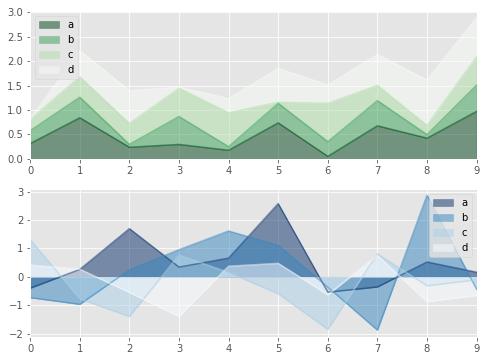

In [92]:
# 面积图

fig, axes = plt.subplots(2, 1, figsize=(8, 6))
df1 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])

df1.plot.area(colormap='Greens_r', alpha=0.5, ax=axes[0])
df2.plot.area(colormap='Blues_r', stacked=False, alpha=0.5, ax=axes[1])
# 默认stacked=True，显示堆叠面积图。此时要求数据必须所有列都是正数或所有列都是负数
# 当数据为NaN时自动填充为0，需要清洗缺失值

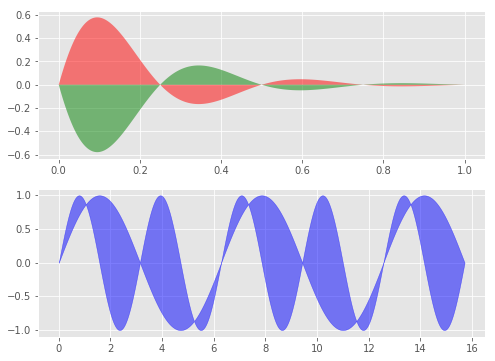

In [96]:
# 填图 - 对函数与坐标轴之间的区域进行填充

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

x = np.linspace(0, 1, 500)
y1 = np.sin(4*np.pi*x) * np.exp(-5*x)
y2 = -np.sin(4*np.pi*x) * np.exp(-5*x)

axes[0].fill(x, y1, 'r', alpha=0.5, label='y1') # 图表1
axes[0].fill(x, y2, 'g', alpha=0.5, label='y1') # 图表2

# fill_between() 填充两个函数之间的区域
x = np.linspace(0, 5*np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2*x)
axes[1].fill_between(x, y1, y2, color='b', alpha=0.5, label='area')

([<matplotlib.patches.Wedge at 0x1222019e8>,
 [Text(1.178482700613784, 1.4903618769795615, 'a'),
  Text(-1.4299004395745183, 1.0933365140269482, 'b'),
  Text(-1.1370003211717716, -1.3954319294237494, 'c'),
  Text(1.3767475520172947, -1.159554301451375, 'd')],
 [Text(0.6202540529546231, 0.7844009878839797, '28.70%'),
  Text(-0.7149502197872591, 0.5466682570134741, '21.81%'),
  Text(-0.5685001605858858, -0.6977159647118747, '27.20%'),
  Text(0.6883737760086474, -0.5797771507256875, '22.28%')])

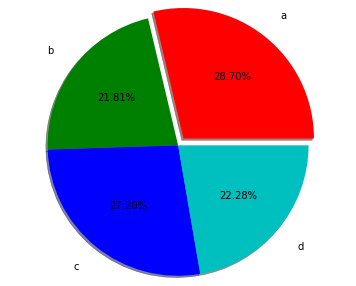

In [97]:
# pit.pie() 饼图

s = pd.Series(3*np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
plt.axis('equal') # 图长宽相等
plt.pie(s,
       explode=[0.1, 0, 0, 0], # 指定每一部分的偏移量
       labels=s.index, # 标签
       colors=['r', 'g', 'b', 'c'], # 颜色
       autopct='%.2f%%', # 饼图上数据标签显示方式
       pctdistance=0.6, # 每个饼切片的中心和通过autopct生成的文本开始之间的比例
       labeldistance=1.2, # 被画饼标记的直径，默认1.1
       shadow=True, # 是否阴影
       startangle=0, # 开始角度
       radius=1.5, # 半径
       frame=False # 圆框
       )

# 直方图

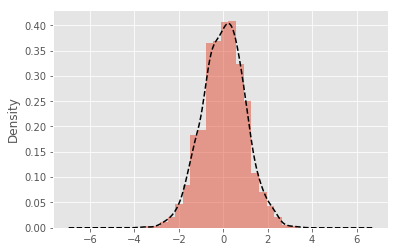

In [101]:
s = pd.Series(np.random.randn(1000))
s.hist(bins=20, # 箱子宽度
      histtype='bar', # 风格：bar/barstacked/step/stepfilled
      align='mid', # 对齐方式：left/mid/right
      orientation='vertical', # 水平horizontal/垂直vertical
      alpha=0.5,
      normed=True # 标准化
      )

s.plot(kind='kde', style='k--') # 添加密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24552f60>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

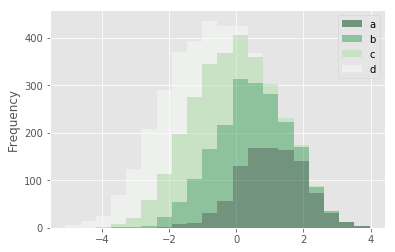

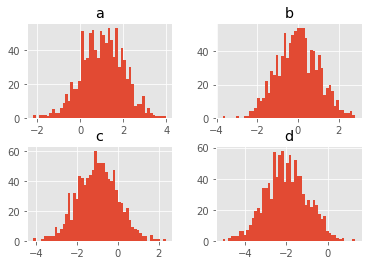

In [103]:
# 堆叠直方图
# DataFrame.plot.hist() / Series.plot.hist()

plt.figure(num=1)
df = pd.DataFrame({
    'a': np.random.randn(1000)+1,
    'b': np.random.randn(1000),
    'c': np.random.randn(1000)-1,
    'd': np.random.randn(1000)-2
})
df.plot.hist(stacked=True, # 是否堆叠
            bins=20,
            colormap='Greens_r',
            alpha=0.5,
            grid=True
            )

df.hist(bins=50) # 生成多个直方图

# 散点图、矩阵散点图
* plt.scatter()
* pd.plotting.scatter_matrix()

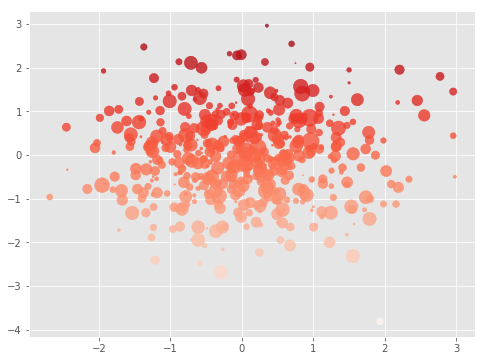

In [104]:
# plt.scatter() 散点图

plt.figure(figsize=(8, 6))
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y, marker='o',
           s=np.random.randn(1000)*100, # 散点的大小
           cmap='Reds', # colormap
           c=y, # 散点的颜色
           alpha=0.8
           )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dbfed68>,
      dtype=object)

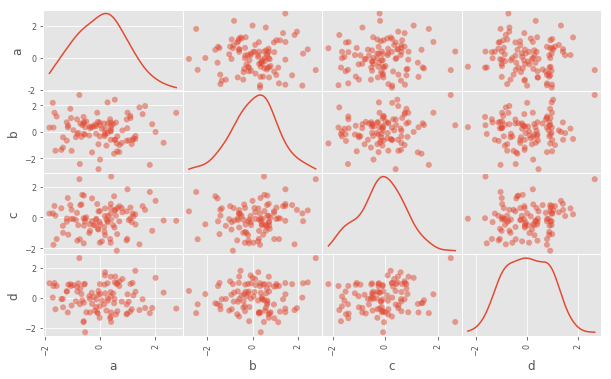

In [106]:
# 矩阵散点图

df = pd.DataFrame(np.random.randn(100, 4), columns=list('abcd'))
pd.plotting.scatter_matrix(df,
                          figsize=(10, 6),
                          marker='o',
                          diagonal='kde', # 每个指标的频率图：hist/kde
                          alpha=0.5,
                          range_padding=0.1 # 图像在x/y轴愿点附近的留白，值越大图像越远离原点
                          )

# 极坐标图


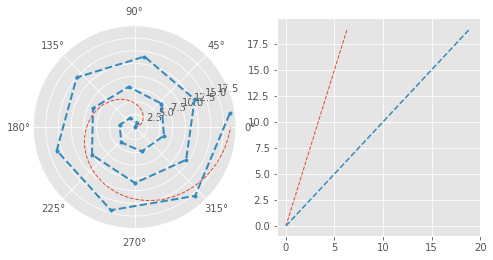

In [111]:
# 极坐标轴

s = pd.Series(np.arange(20))
theta = np.arange(0, 2*np.pi, 0.02)

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121, projection='polar') # projiction='polar'，创建极坐标子图
ax2 = plt.subplot(122)

ax1.plot(theta, theta*3, linestyle='--', lw=1)
ax1.plot(s, linestyle='--', marker='.', lw=2)
ax2.plot(theta, theta*3, linestyle='--', lw=1)
ax2.plot(s, linestyle='--')
# plt.grid()

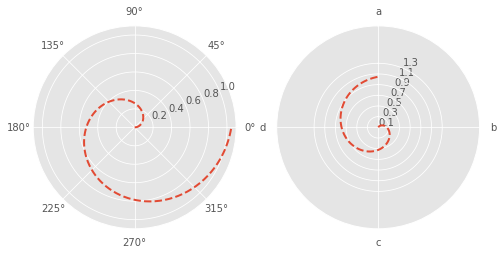

In [114]:
# 参数设置

theta = np.arange(0, 2*np.pi, 0.02)
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122, projection='polar')
ax1.plot(theta, theta/6, '--', lw=2)
ax2.plot(theta, theta/6, '--', lw=2)

ax2.set_theta_direction(-1) # 坐标轴方向，默认为逆时针，-1为顺时针
ax2.set_thetagrids(np.arange(0.0, 360.0, 90), list('abcd')) # 设置极坐标角度网格线显示及标签
ax2.set_rgrids(np.arange(0.2, 2, 0.4)) # 设置极径网格线显示，参数必须为正数
ax2.set_theta_offset(np.pi/2) # 设置坐标轴角度偏移，逆时针弧度制
ax2.set_rlim(0.2, 1.2) # 设置显示的极径范围
ax2.set_rmax(2) # 设置显示的极径最大值
ax2.set_rticks(np.arange(0.1, 1.5, 0.2)) # 设置极径网格线的显示范围

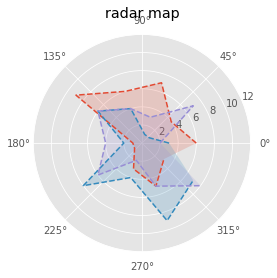

In [117]:
# 雷达图 - 极坐标的折线图/填图 plt.plot()

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(111, projection='polar')
ax1.set_title('radar map') # 标题
ax1.set_rlim(0, 12)

data1 = np.random.randint(1, 10, 10)
data2 = np.random.randint(1, 10, 10)
data3 = np.random.randint(1, 10, 10)
theta = np.arange(0, 2*np.pi, 2*np.pi/10)

ax1.plot(theta, data1, '--', label='data1')
ax1.fill(theta, data1, alpha=0.2) # 填图
ax1.plot(theta, data2, '--', label='data2')
ax1.fill(theta, data2, alpha=0.2) # 填图
ax1.plot(theta, data3, '--', label='data3')
ax1.fill(theta, data3, alpha=0.2) # 填图

(0, 10)

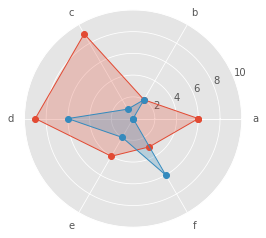

In [118]:
# 雷达图 - 极坐标的折线图/填图 plt.polar()
# 需要首尾闭合，不需要特意设置极坐标

labels = np.array(list('abcdef'))
dataLenth = 6 # 数据长度
data1 = np.random.randint(0, 10, 6)
data2 = np.random.randint(0, 10, 6)

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False) # 分隔圆的周长
data1 = np.concatenate((data1, [data1[0]])) # 首尾闭合
data2 = np.concatenate((data2, [data2[0]]))
angles = np.concatenate((angles, [angles[0]]))

plt.polar(angles, data1, 'o-', linewidth=1)
plt.fill(angles, data1, alpha=0.25)
plt.polar(angles, data2, 'o-', linewidth=1)
plt.fill(angles, data2, alpha=0.25)

plt.thetagrids(angles*180/np.pi, labels) # 设置网格、标签
plt.ylim(0, 10)

(<a list of 8 Line2D thetagridline objects>,
 <a list of 4 Text thetagridlabel objects>)

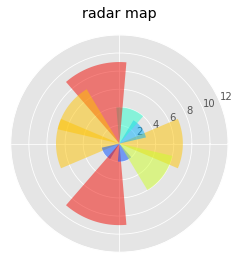

In [122]:
# 极轴图 - 极坐标的柱状图

plt.figure(figsize=(8, 4))
ax1 = plt.subplot(111, projection='polar')
ax1.set_title('radar map')
ax1.set_rlim(0, 12)

data = np.random.randint(1, 10, 10)
theta = np.arange(0, 2*np.pi, 2*np.pi/10)

bar = ax1.bar(theta, data, alpha=0.5) # 柱状
for r, bar in zip(data, bar):
    bar.set_facecolor(plt.cm.jet(r/10.)) # 设置颜色
plt.thetagrids(np.arange(0.0, 360.0, 90), []) # 设置网格、标签

# 箱形图
**箱形图**：一种用作显示一组数据分散情况资料的统计图，包含一组数据的：最大值、最小值、中位数、上四分位数(Q1)、下四分位数(Q3)、异常值
* 中位数：一组数据排序后处于最中间的数
* 上四分位数Q1:将数据排序后平均分为四分，分为(n+1)/4与(n-1)/4两种，一般为(n+1)/4
* 下四分位数Q3:(n+1)/4*3
* 内限：T形的盒须就是内限，最大值区间为Q3+1.5IQR，最小值区间为Q1-1.5IQR，IQR=Q3-Q1
* 外限：最大值Q3+3IQR，最小值Q1-3IQR
* 异常值：内限之外，中度异常；外限之外，极度异常

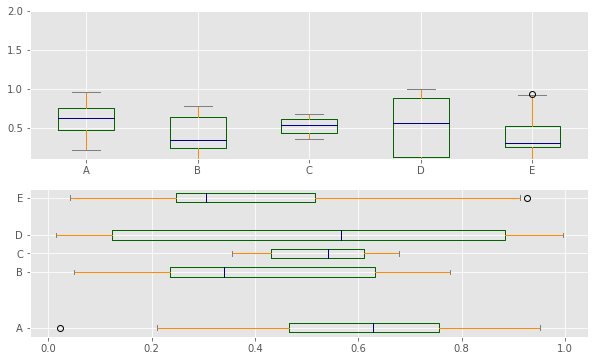

In [132]:
# plt.plot().box()

fig, axes = plt.subplots(2, 1, figsize=(10, 6))
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
color = dict(boxes='DarkGreen', # 箱线
             whiskers='DarkOrange', # 分位数与误差线横线之间竖线的颜色
             medians='DarkBlue', # 中位数线颜色
             caps='Gray' # 误差线横线颜色
            )

df.plot.box(ylim=[0.1, 2],
           grid=True,
           color=color,
           ax=axes[0])
df.plot.box(vert=False, # 是否垂直，默认True
           positions=[1, 4, 5, 6, 8], # 箱形图占位，对应各箱的位置
           ax=axes[1],
           grid=True,
           color=color)

Text(0.5, 1.0, 'boxplot')

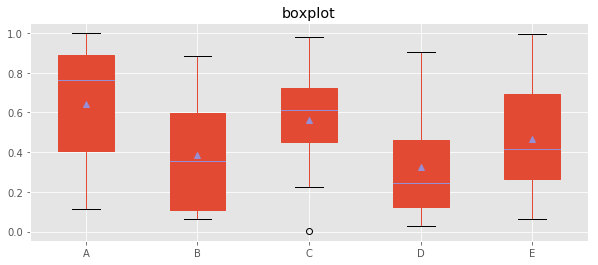

In [138]:
# DataFrame.boxplot()

df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
plt.figure(figsize=(10, 4))

f = df.boxplot(sym='o', # 异常点形状，同marker
               vert=True, # 是否垂直
               whis=1.5, # IQR，默认为1.5，即指内限；也可以设置区间如[5, 95]，代表强制上下边缘为95%和5%位置
               patch_artist=True, # 上下四分位框内是否填充
               meanline=False, # 是否显示均值（线）
               showmeans=True, # 是否显示均值（点）
               showbox=True, # 是否显示箱线
               showcaps=True, # 是否显示边缘线
               showfliers=True, # 是否显示异常值
               notch=False, # 中间箱体是否缺口
               return_type='dict' # 返回类型为dict
              )
plt.title('boxplot')

,col1,col2,X,Y
0,0.029128,0.808124,A,A
1,0.880862,0.246899,A,B
2,0.088657,0.535313,A,A
3,0.036083,0.334103,A,B
4,0.639070,0.081873,A,A


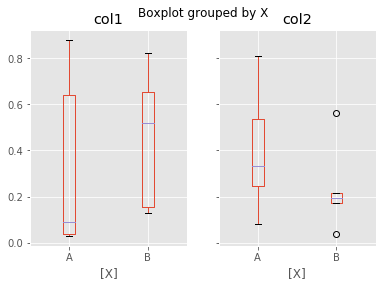

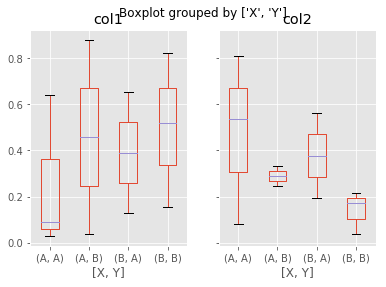

In [156]:
# plt.boxplot() 分组汇总
# columns：按照数据的列分子图
# by：按照列分组做箱形图

df = pd.DataFrame(np.random.rand(10, 2), columns=['col1', 'col2'])
df['X'] = pd.Series(list(np.sort(['A', 'B']*5)))
df['Y'] = pd.Series(['A', 'B']*5)

df.boxplot(by='X') # 根据X进行分组汇总
df.boxplot(column=['col1', 'col2'], by=['X', 'Y'])
df.head()